<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/main/notebooks/causal_method/unified_approach/4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 - Clustering process and validation



---



---



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering

df_url ="https://raw.githubusercontent.com/douglasmmachado/MedicineConsumption/main/datasets/time_series/df_resampled.csv"

numerical_features = ['LIT_HC', 'LIT_HP', 'N_ETB',
'N_UFS', 'PN_MEDICAL', 'POPULATION',
'P_MEDICAL', 'QUANTITY', 'QUANTITY_MA',
'SEJ_HAD', 'SEJ_MCO', 'SEJ_PSY',
'SEJ_SLD', 'SEJ_SSR']

df = pd.read_csv(df_url)

# Convert numerical columns to string
for i, curr_df in enumerate([df]):
    numerical_columns = ['HOSPI_CODE_UCD']
    curr_df[numerical_columns] = curr_df[numerical_columns].astype('string')

df['DATE'] = pd.to_datetime(df['DATE'],
              format='%Y-%m')  # Changed the type of date too

df['YEAR'] = df['DATE'].dt.year

medicines = ['3400892088310','3400892075761','3400892203645',
             '3400892065366','3400892052120','3400891996128',
             '3400893826706','3400893736135','3400893875490',
             '3400890837149','3400891235203','3400891225037',
             '3400891191226','3400892729589','3400892745848',
             '3400892697789','3400892761527','3400893022634',
             '3400892761695','3400892669236','3400892508566']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_SITE_RATTACHE  3276 non-null   object        
 1   HOSPI_CODE_UCD    3276 non-null   string        
 2   MONTH             3276 non-null   int64         
 3   QUANTITY          3276 non-null   float64       
 4   N_UFS             3276 non-null   float64       
 5   DATE              3276 non-null   datetime64[ns]
 6   N_ETB             3276 non-null   float64       
 7   POPULATION        3276 non-null   float64       
 8   P_MEDICAL         3276 non-null   float64       
 9   PN_MEDICAL        3276 non-null   float64       
 10  LIT_HC            3276 non-null   float64       
 11  LIT_HP            3276 non-null   float64       
 12  SEJ_MCO           3276 non-null   float64       
 13  SEJ_HAD           3276 non-null   float64       
 14  SEJ_PSY           3276 n

In [18]:
hospi_codes = df['ID_SITE_RATTACHE'].values
df_encoded = pd.get_dummies(df, columns=['MONTH', 'YEAR', 'ID_SITE_RATTACHE'], prefix=['MONTH', 'YEAR', 'HOSPI'], drop_first=False)
df_encoded['ID_SITE_RATTACHE'] = hospi_codes
df_encoded

,HOSPI_CODE_UCD,QUANTITY,N_UFS,DATE,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,...,MONTH_12,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,HOSPI_HOSPI_1,HOSPI_HOSPI_2,HOSPI_HOSPI_3,HOSPI_HOSPI_4,ID_SITE_RATTACHE
0,3400890837149,1300.0,2.0,2016-01-01,12.0,572744.0,683.0,5273.0,1388.0,105.0,...,0,1,0,0,0,1,0,0,0,HOSPI_1
1,3400890837149,0.0,1.0,2016-01-01,5.0,539067.0,714.0,5001.0,1157.0,187.0,...,0,1,0,0,0,0,1,0,0,HOSPI_2
2,3400890837149,4080.0,7.0,2016-01-01,50.0,1132481.0,1290.0,7336.0,2030.0,506.0,...,0,1,0,0,0,0,0,1,0,HOSPI_3
3,3400890837149,16300.0,1.0,2016-01-01,39.0,1835903.0,2526.0,15604.0,4536.0,470.0,...,0,1,0,0,0,0,0,0,1,HOSPI_4
4,3400891191226,3076.0,7.0,2016-01-01,12.0,572744.0,683.0,5273.0,1388.0,105.0,...,0,1,0,0,0,1,0,0,0,HOSPI_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,3400893826706,1150.0,1.0,2019-03-01,39.0,1871364.0,2639.0,15774.0,4530.0,514.0,...,0,0,0,0,1,0,0,0,1,HOSPI_4
3272,3400893875490,764.0,1.0,2019-03-01,12.0,569894.0,843.0,5438.0,1353.0,100.0,...,0,0,0,0,1,1,0,0,0,HOSPI_1
3273,3400893875490,1330.0,5.0,2019-03-01,5.0,542302.0,706.0,5013.0,1141.0,141.0,...,0,0,0,0,1,0,1,0,0,HOSPI_2
3274,3400893875490,2245.0,21.0,2019-03-01,50.0,1171739.0,1318.0,7578.0,2011.0,529.0,...,0,0,0,0,1,0,0,1,0,HOSPI_3


## 4.1 - Train, Test split

In [23]:
X = df_encoded[df_encoded['HOSPI_CODE_UCD']!= '3400891996128'].copy().drop(["HOSPI_CODE_UCD", 'DATE', 'ID_SITE_RATTACHE'],axis=1).values

## 4.2 - K-means model with different cluster composition
## &
## 4.3 - Model evaluation

In [24]:
def kmeans_clustering(X, n_clusters=2):
    model = KMeans(n_clusters=n_clusters,
                   init = 'k-means++',
                   n_init=1,
                   max_iter=10,
                   random_state=42)
    model.fit(X)
    return model

In [7]:
from sklearn.cluster import MiniBatchKMeans

def minibatch_kmeans_clustering(X, n_clusters=2):
    model = MiniBatchKMeans(n_clusters=n_clusters,
                            init='k-means++',
                            n_init=1,
                            batch_size=10,
                            max_iter=10,
                            random_state=42)
    model.fit(X)
    return model

In [8]:
def dbscan_clustering(X, eps=0.5, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X)
    return model


In [9]:
def agglomerative_clustering(X, n_clusters=2, metric = 'euclidean', linkage = 'ward'):

  if (linkage == 'ward') & (metric != 'euclidean'):
    print('Only euclidean metric is accepted when using ward')
    metric = 'euclidean'

  model = AgglomerativeClustering(n_clusters=n_clusters,
                                  linkage = linkage,
                                  metric = metric)

  model.fit(X)
  return model

In [10]:
def evaluate_clustering(X, n_clusters=2, verbose=False, algorithm='k-means', metric = 'euclidean', linkage = 'ward'):
    if algorithm == 'k-means':
        model = kmeans_clustering(X, n_clusters)
    elif algorithm == 'mini-batch':
        model = minibatch_kmeans_clustering(X, n_clusters)
    elif algorithm == 'dbscan':
        model = dbscan_clustering(X)
    elif algorithm == 'agglomerative':
        model = agglomerative_clustering(X, n_clusters, metric, linkage)

    labels = model.fit_predict(X)

    silhouette = metrics.silhouette_score(X, labels, metric=metric)
    davies_bouldin = metrics.davies_bouldin_score(X, labels)

    if verbose:

        print(f'--- Algorithm: {algorithm}')
        metrics_string = '#'*10+' Metrics for test split - '+f'{n_clusters} clusters '+'#'*10
        print()
        print('#'*len(metrics_string))
        print(metrics_string)
        print()
        print(f'Silhouette Score: {round(silhouette, 2)}')
        print(f'Davies-Bouldin Score: {round(davies_bouldin, 2)}')
        print()
        print('#'*len(metrics_string))
        print('#'*len(metrics_string))
        print()

    return silhouette, davies_bouldin

In [11]:
def visualize_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, algorithm):

  # Find optimal cluster numbers based on the scores
  s_max = np.argmax(s_scores)+2
  dbs_min = np.argmin(dbs_scores)+2

  # Print the best scores and cluster numbers
  string_array = '#'*10 + ' Metrics best performance for different clusters - Algorithm: ' + f'{algorithm}' + '#'*10
  len_string_array = len(string_array)
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()
  print(string_array)
  print(f'Best score for Silhouette metric: {max(s_scores):.2f} for {s_max} clusters')
  print(f'Best score for Davies Bouldin metric: {min(dbs_scores):.2f} for {dbs_min} clusters')
  print()
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()

  # Plot Silhouette scores
  x = np.arange(min_clusters, max_clusters+1)
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

  # Plot Silhouette scores
  axs[0].stem(x, s_scores, linefmt='C0-', markerfmt='C0o', basefmt=' ')
  axs[0].set_xlabel('Number of Clusters')
  axs[0].set_ylabel('Silhouette Score')
  axs[0].set_title('Silhouette Scores for Different Cluster Numbers')
  axs[0].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[0].set_ylim([0, 1])
  axs[0].grid(True)

  # Plot Davies Bouldin Scores
  axs[1].stem(x, dbs_scores, linefmt='C1-', markerfmt='C1o', basefmt=' ')
  axs[1].set_xlabel('Number of Clusters')
  axs[1].set_ylabel('Davies Bouldin Score')
  axs[1].set_title('Davies Bouldin Scores for Different Cluster Numbers')
  axs[1].set_xticks(np.arange(2, max_clusters+1, 1))
  axs[1].set_ylim([0, 1])
  axs[1].grid(True)

  plt.show()

In [12]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import time

def create_elbow_plot(X, max_clusters=10, sample_fraction=0.1):
    # Sample a subset of the data for faster processing (optional)
    n_samples = int(sample_fraction * len(X))
    X_sample = X[:n_samples]

    # Initialize lists to store inertia and training times
    kmeans_inertia = []
    kmeans_train_time = []
    minibatch_inertia = []
    minibatch_train_time = []

    # Perform K-means clustering for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        # Perform K-means clustering
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters,
                        init = 'k-means++',
                        n_init=1,
                        max_iter=10,
                        random_state=42)

        kmeans.fit(X_sample)
        train_time = time.time() - start_time

        # Calculate inertia (within-cluster sum of squares)
        inertia = kmeans.inertia_

        # Append inertia and training time to the respective lists
        kmeans_inertia.append(inertia)
        kmeans_train_time.append(train_time)

    # Perform Mini-Batch K-means clustering for different numbers of clusters
    for n_clusters in range(1, max_clusters + 1):
        # Perform Mini-Batch K-means clustering
        start_time = time.time()
        minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                                           init = 'k-means++',
                                           n_init=1,
                                           max_iter=10,
                                           batch_size=10,
                                           random_state=42)
        minibatch_kmeans.fit(X_sample)
        train_time = time.time() - start_time

        # Calculate inertia (within-cluster sum of squares)
        distances = pairwise_distances_argmin_min(X_sample, minibatch_kmeans.cluster_centers_)
        minibatch_inertia.append(sum(distances[1]))

        # Append inertia and training time to the respective lists
        minibatch_train_time.append(train_time)

    # Create the plots
    plt.figure(figsize=(12, 5))

    # Elbow plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), kmeans_inertia, marker='o', label='K-means')
    plt.plot(range(1, max_clusters + 1), minibatch_inertia, marker='o', label='Mini-Batch K-means')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-means and Mini-Batch K-means')
    plt.grid(True)
    plt.legend()

    # Training time plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_clusters + 1), kmeans_train_time, marker='o', label='K-means')
    plt.plot(range(1, max_clusters + 1), minibatch_train_time, marker='o', label='Mini-Batch K-means')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time for K-means and Mini-Batch K-means')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


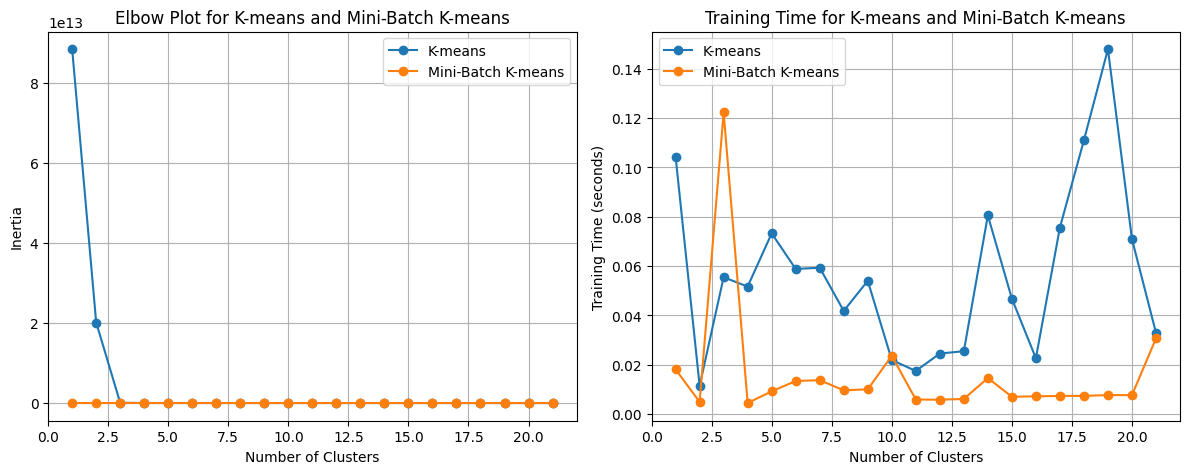

In [25]:
create_elbow_plot(X, max_clusters=21, sample_fraction=0.1)

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: k-means##########
Best score for Silhouette metric: 0.97 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------



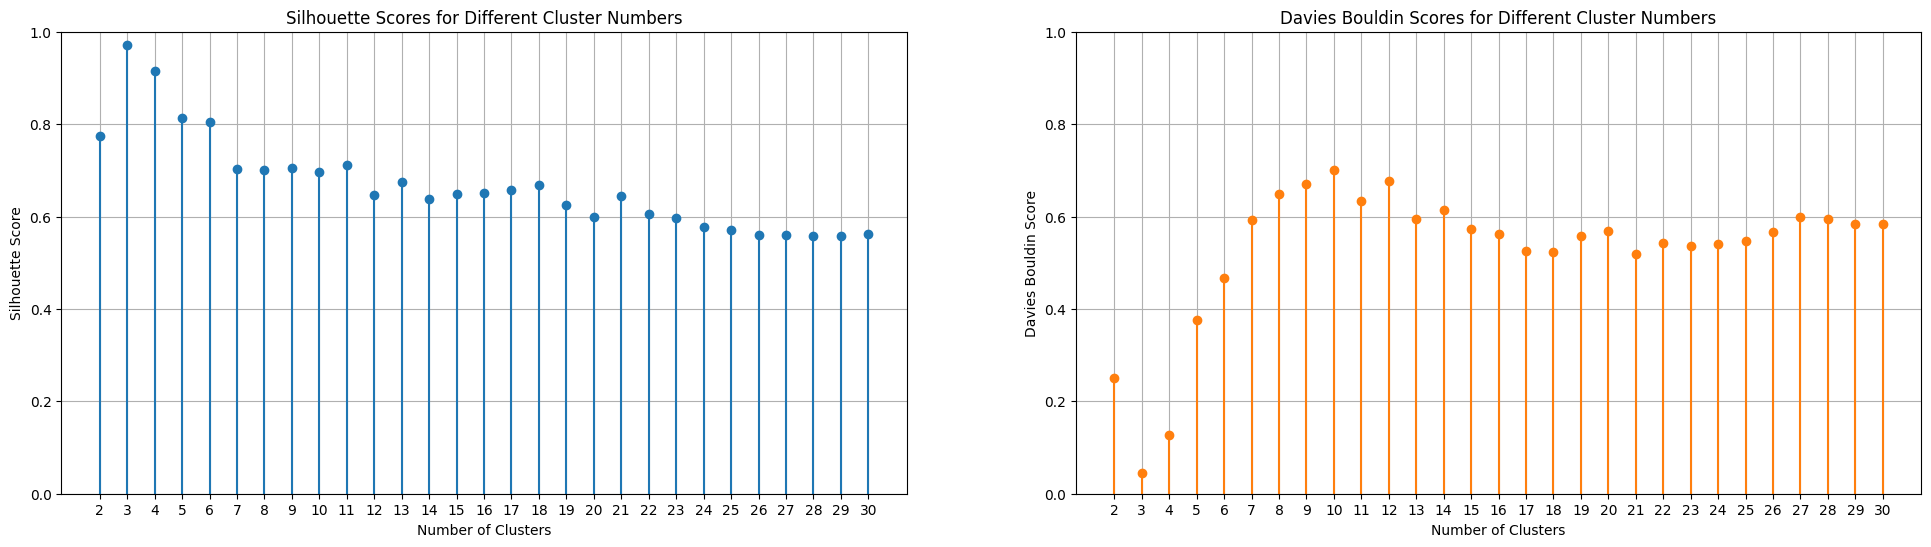

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: mini-batch##########
Best score for Silhouette metric: 0.97 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------



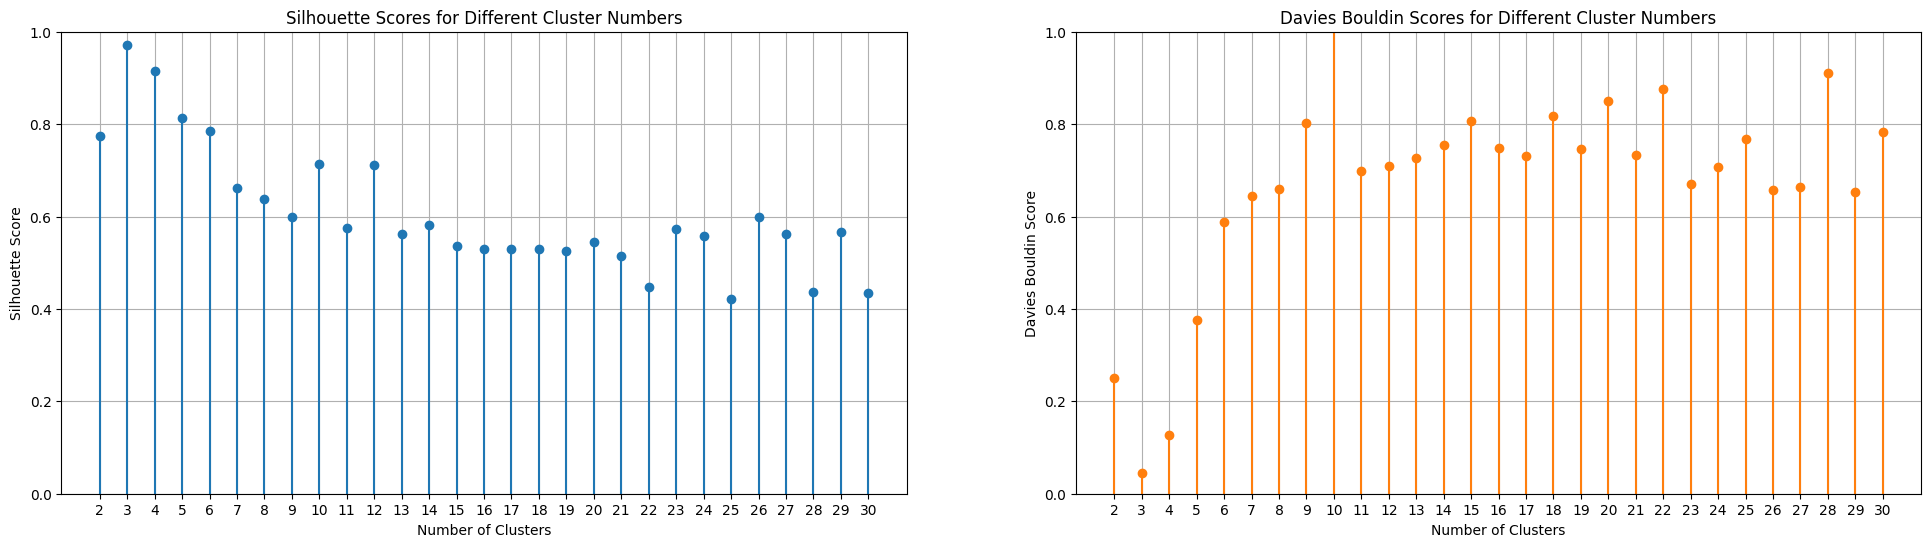

--- Metric: l1
--- Linkage: complete
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.96 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



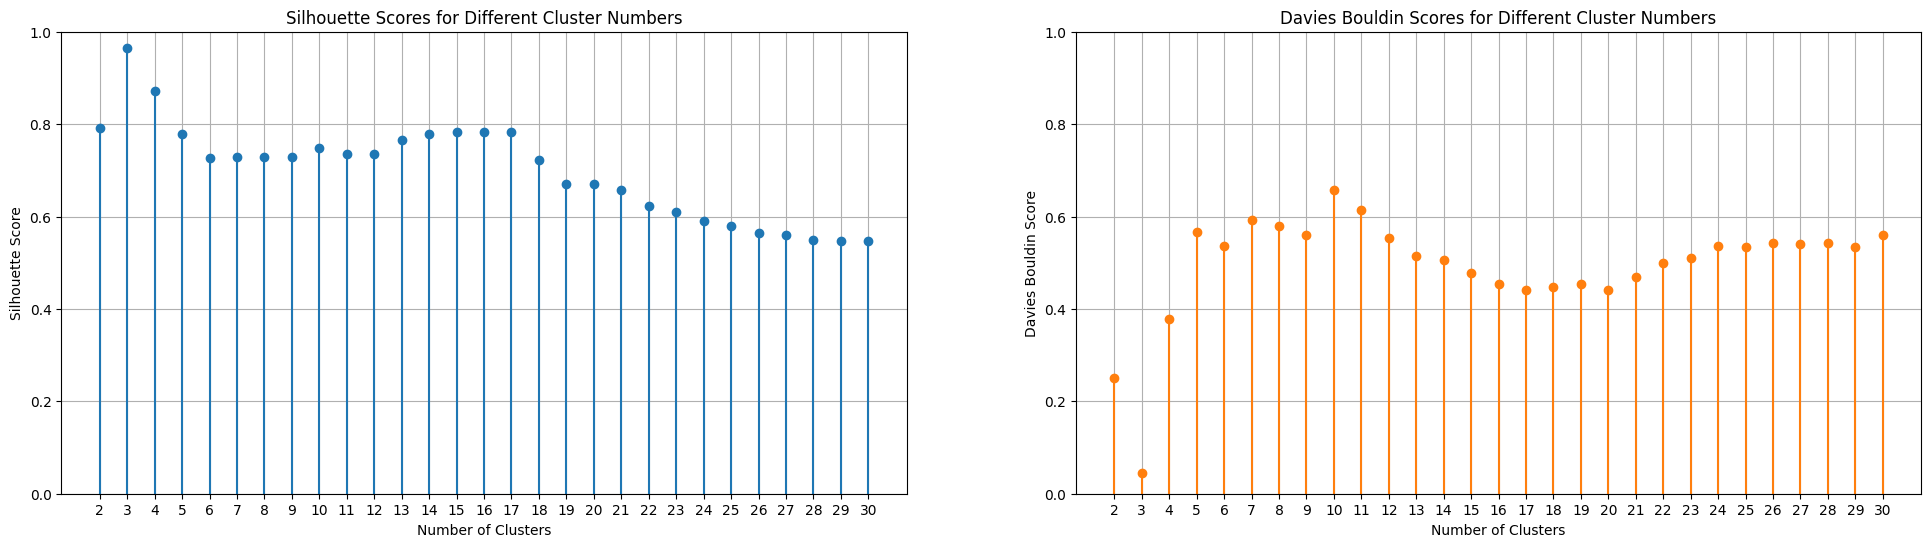

--- Metric: l2
--- Linkage: complete
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.97 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



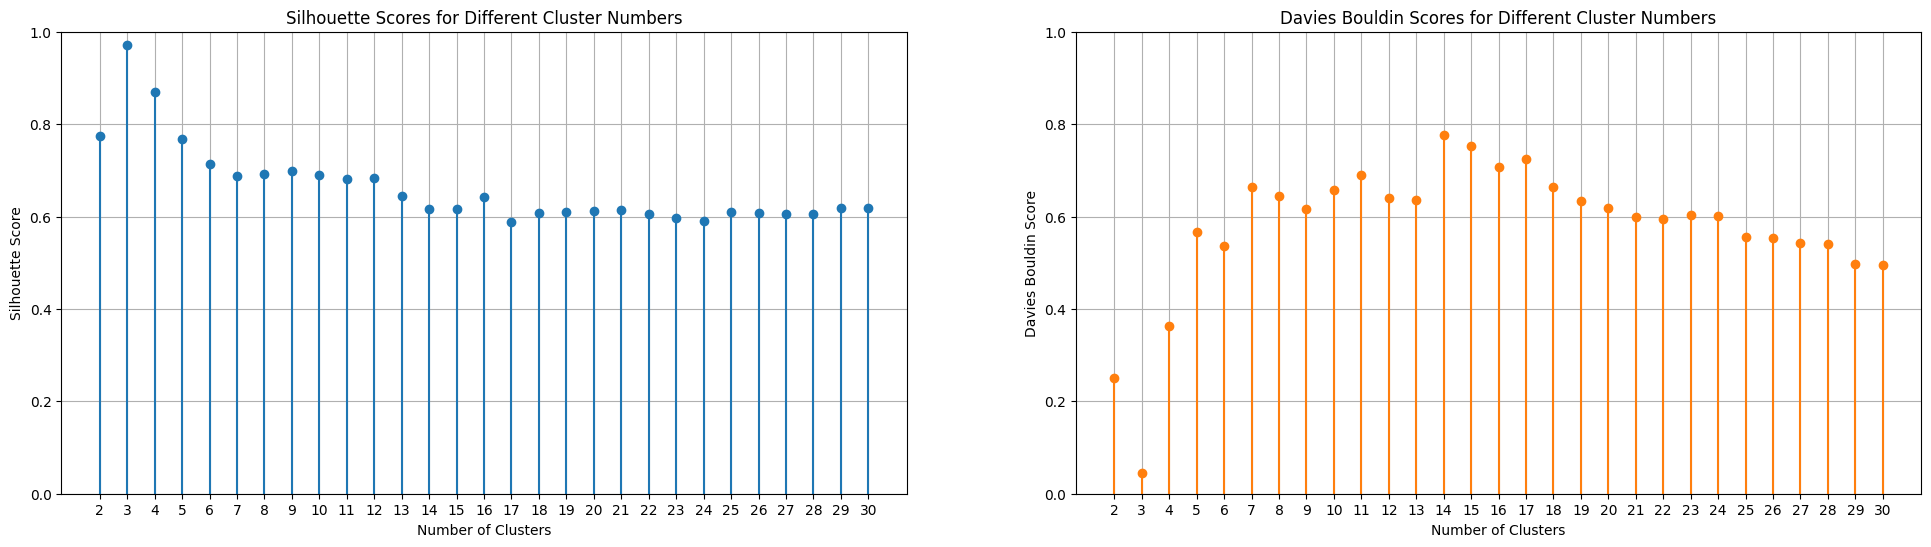

--- Metric: manhattan
--- Linkage: complete
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.96 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



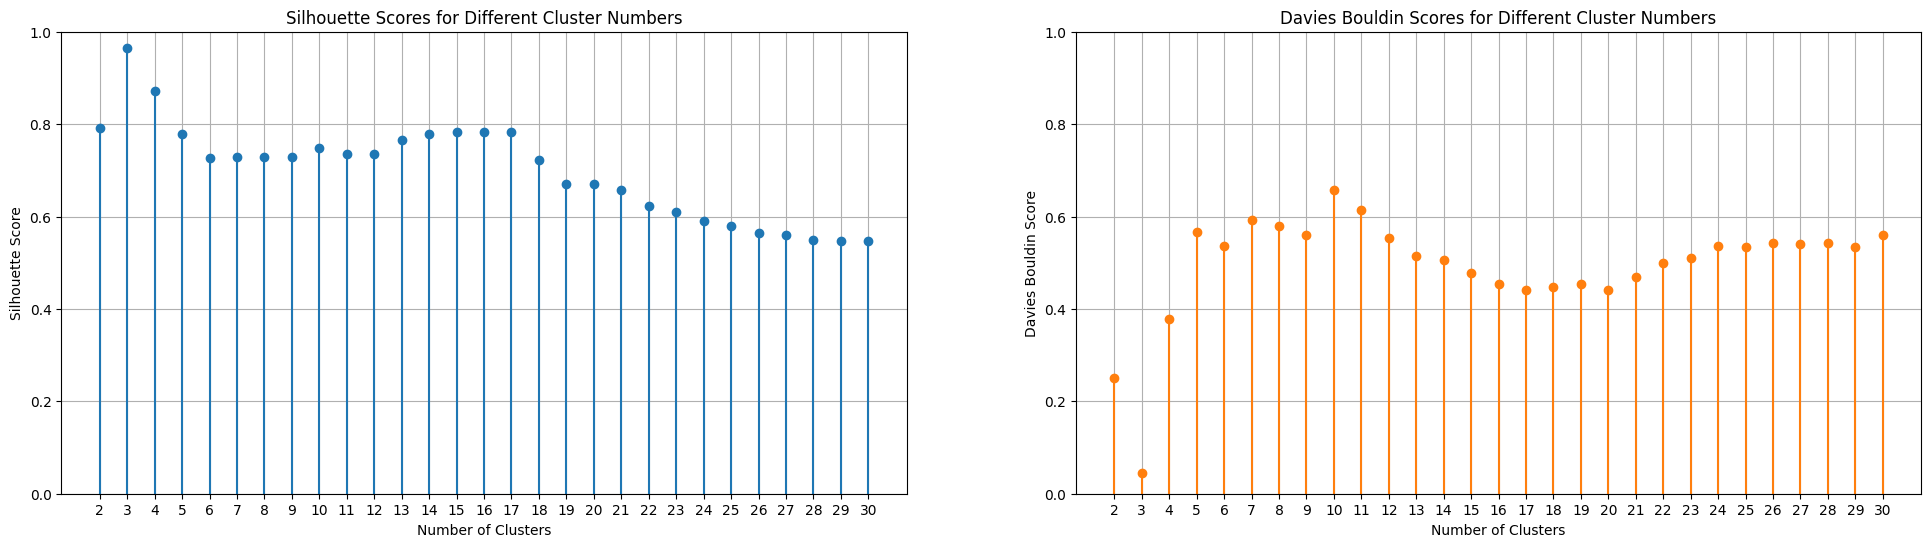

--- Metric: cosine
--- Linkage: complete
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.93 for 2 clusters
Best score for Davies Bouldin metric: 3.13 for 5 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



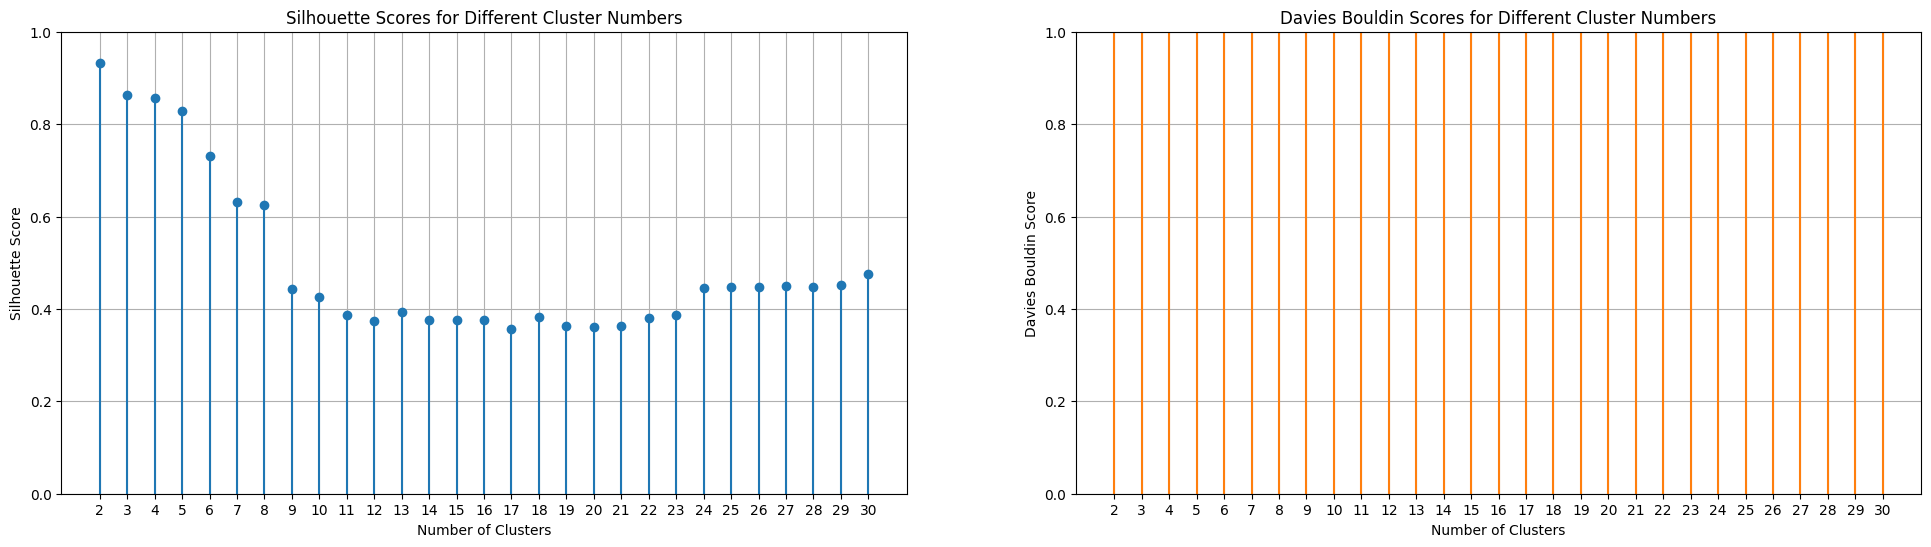

--- Metric: l1
--- Linkage: average
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.96 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



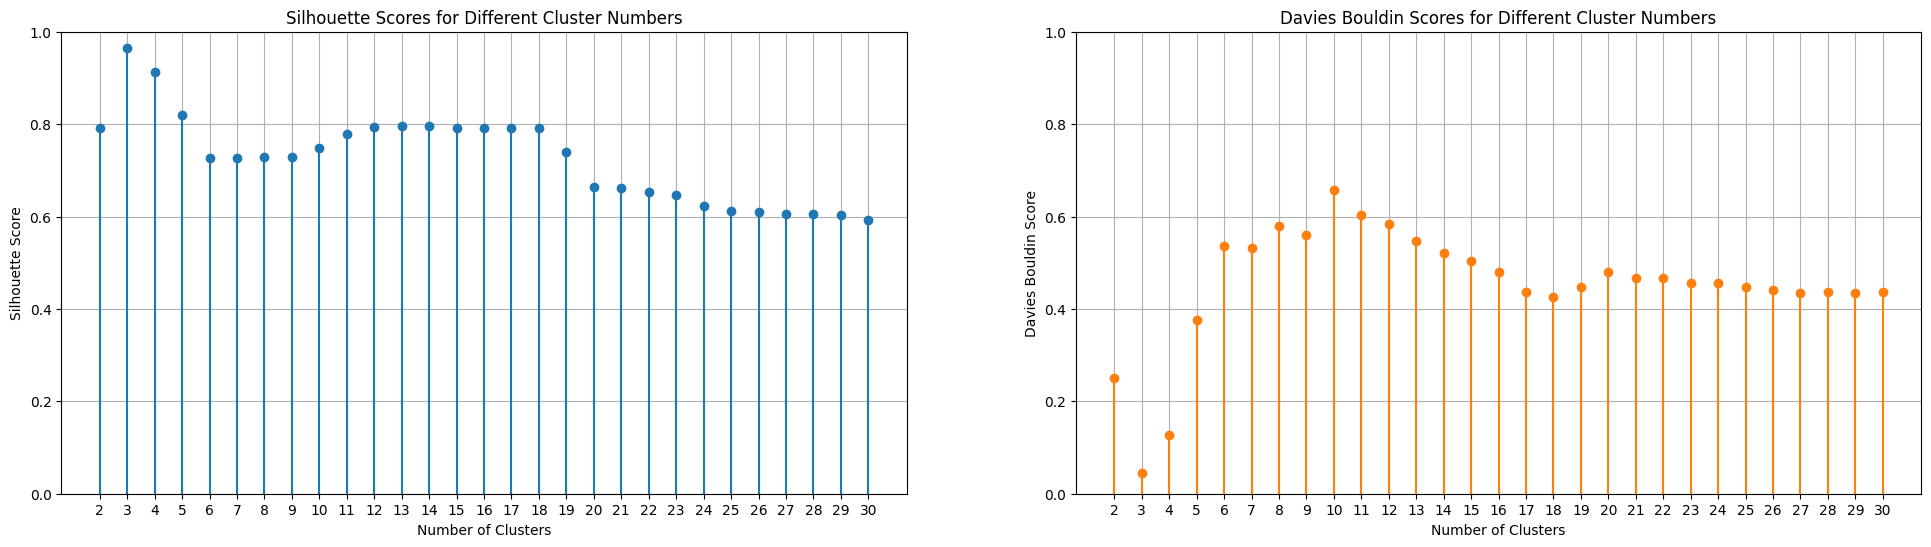

--- Metric: l2
--- Linkage: average
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.97 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



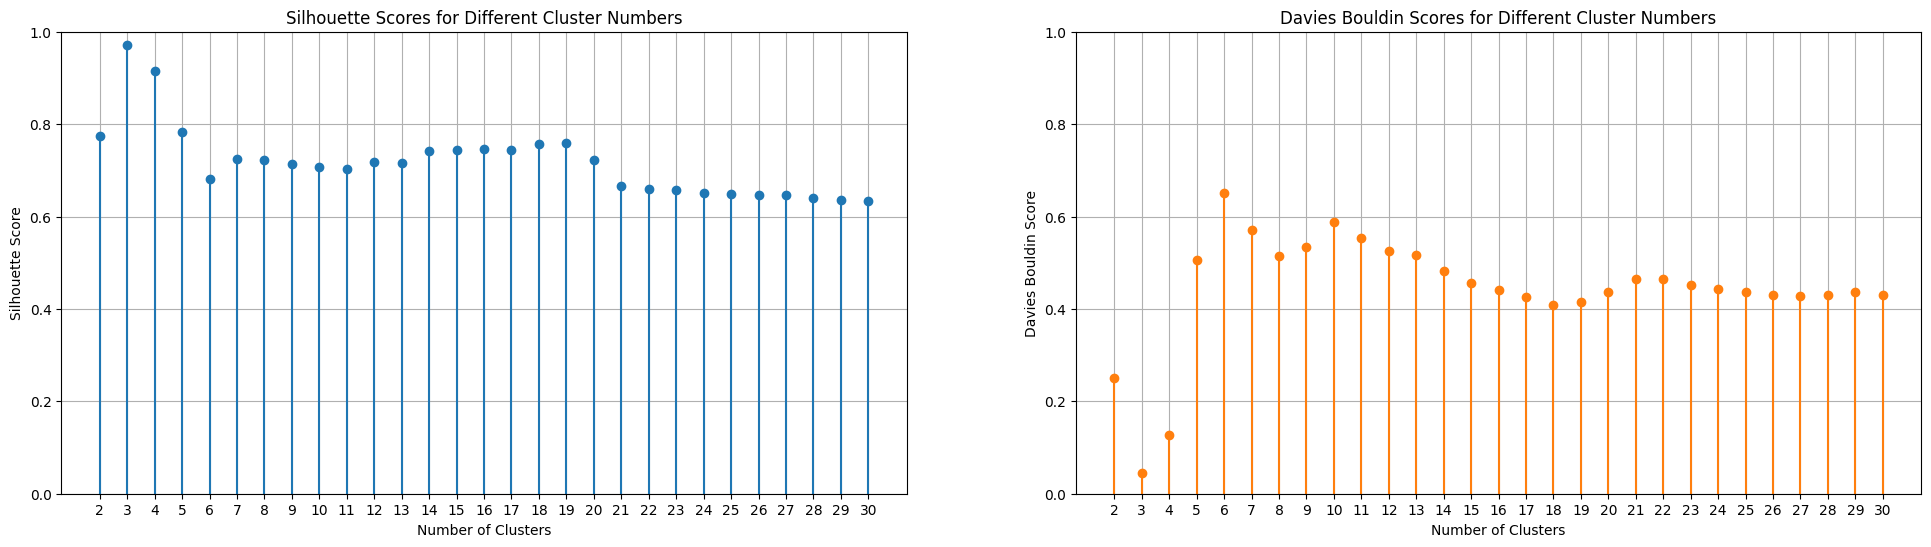

--- Metric: manhattan
--- Linkage: average
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.96 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



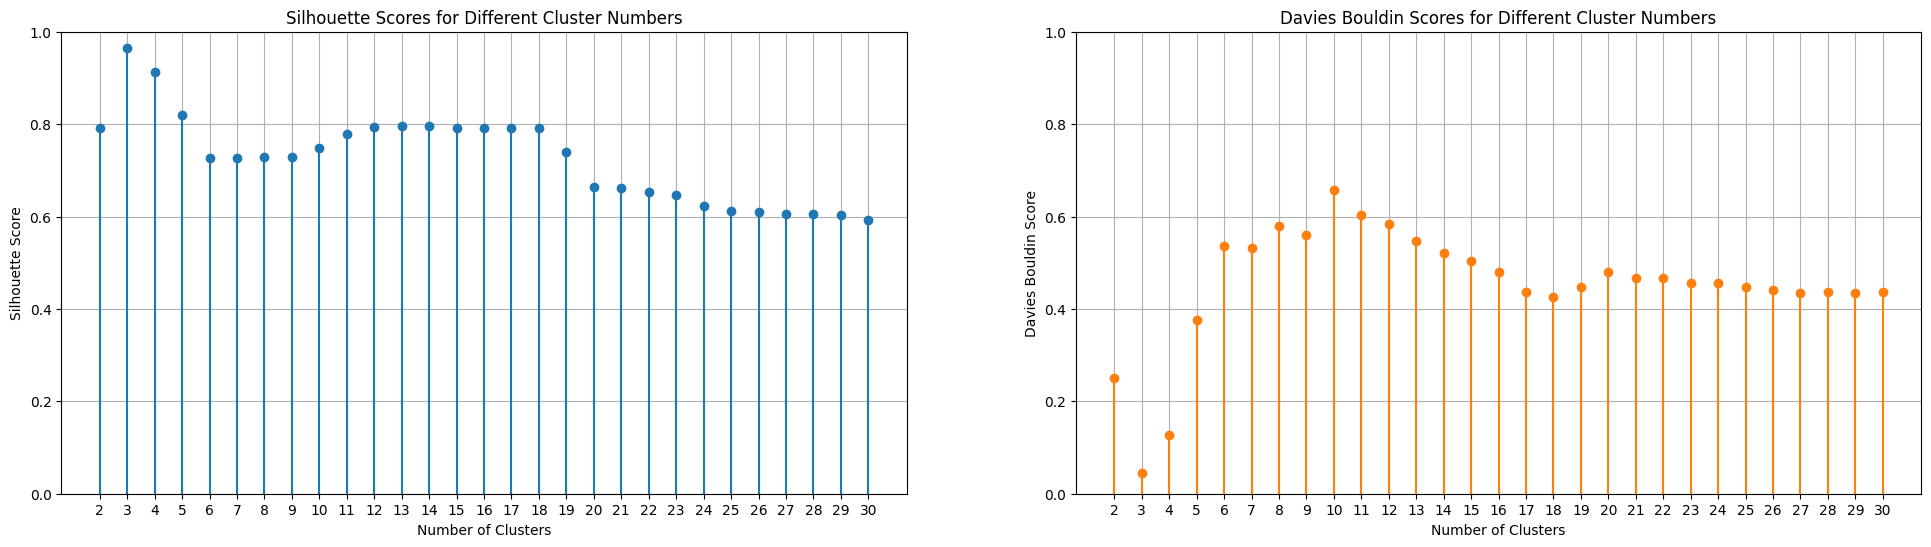

--- Metric: cosine
--- Linkage: average
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.93 for 2 clusters
Best score for Davies Bouldin metric: 3.10 for 5 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



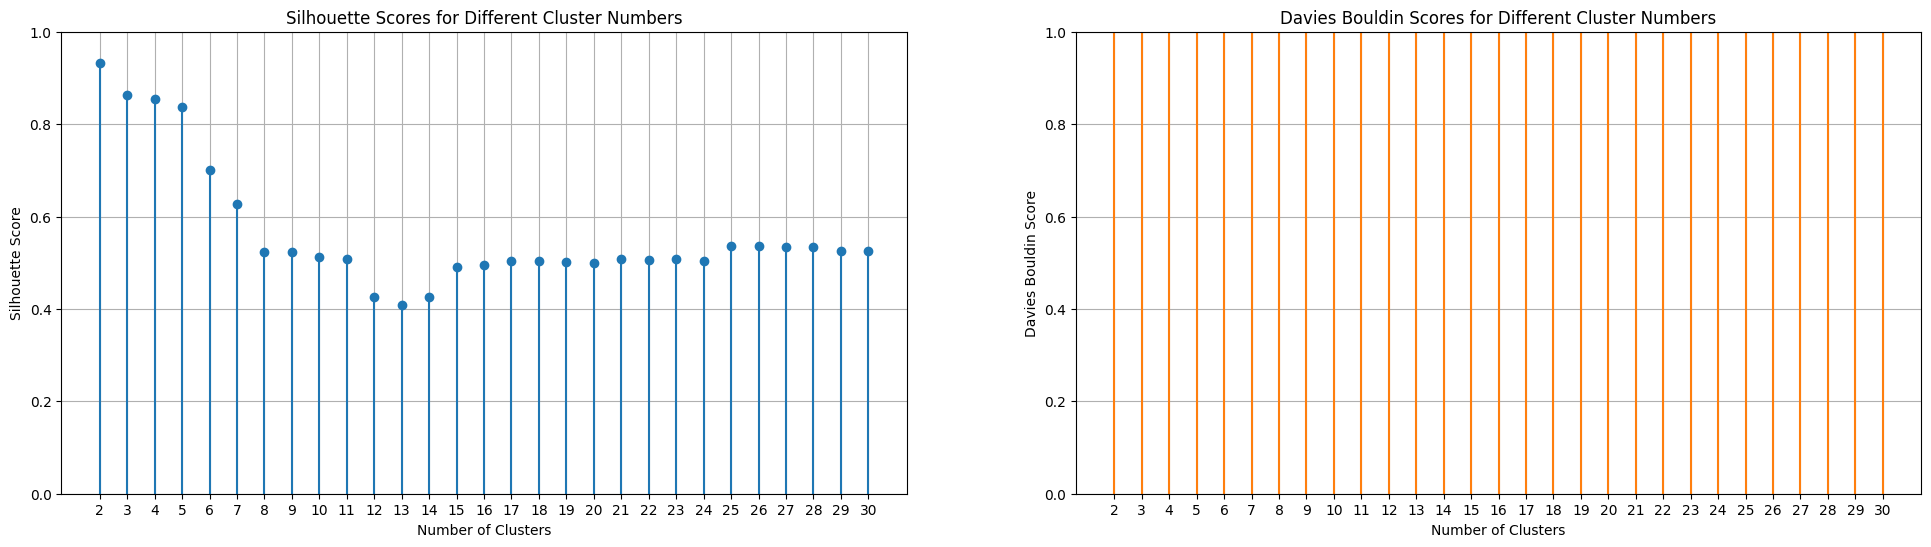

--- Metric: l1
--- Linkage: single
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.96 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



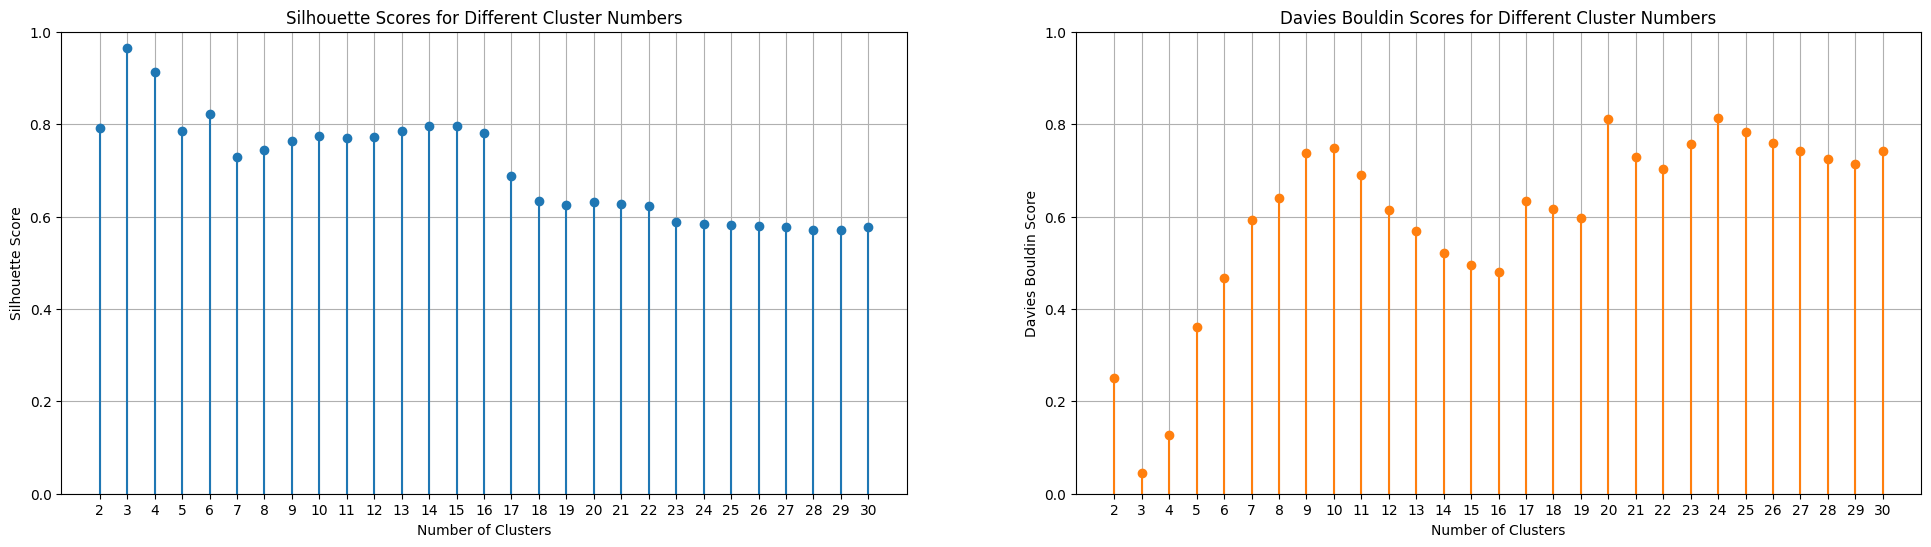

--- Metric: l2
--- Linkage: single
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.97 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



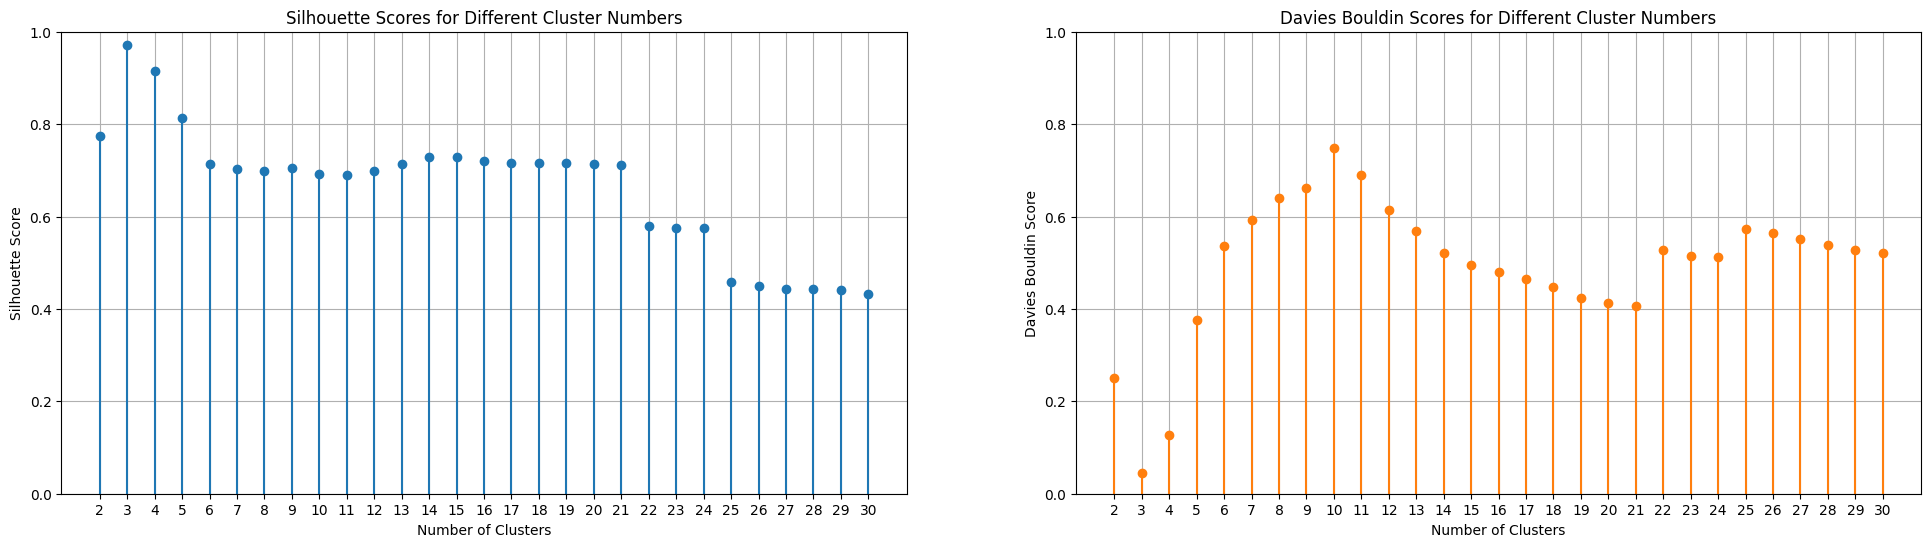

--- Metric: manhattan
--- Linkage: single
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.96 for 3 clusters
Best score for Davies Bouldin metric: 0.05 for 3 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



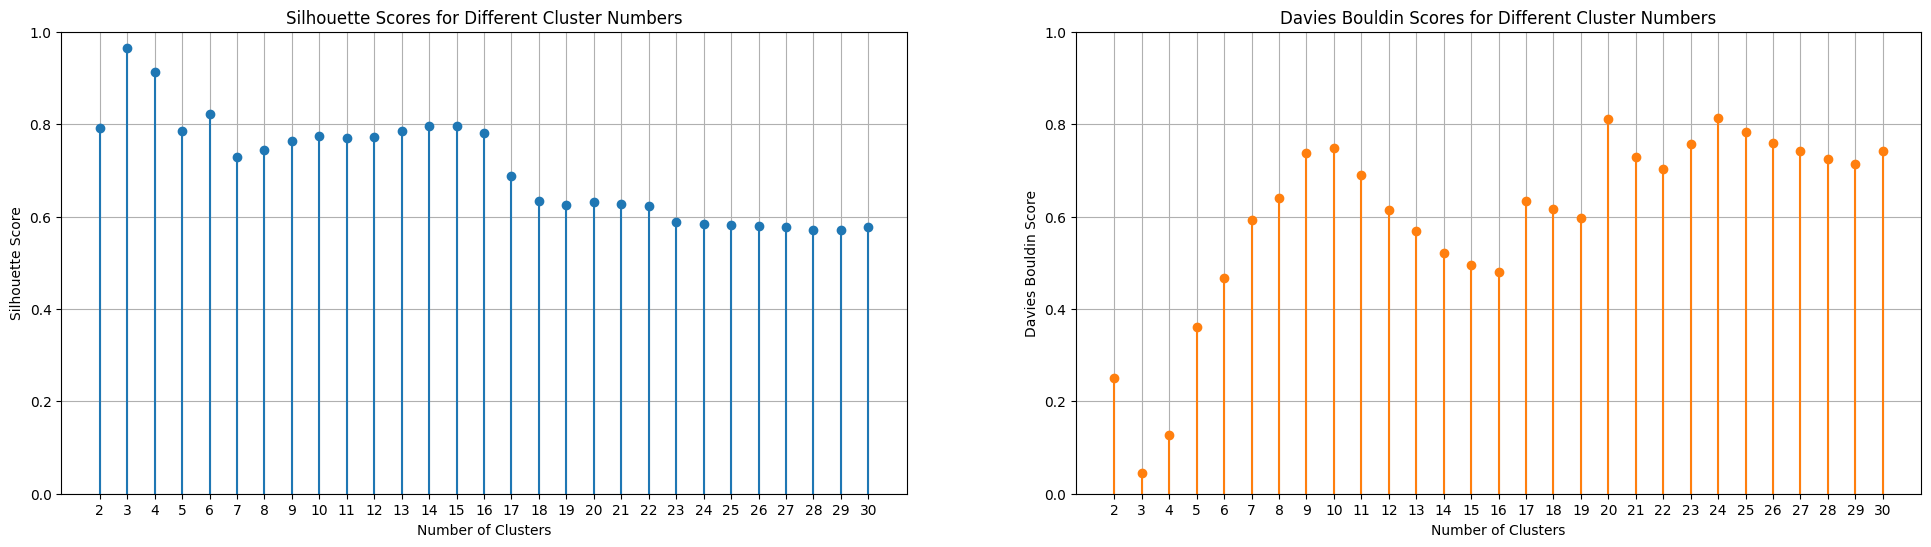

--- Metric: cosine
--- Linkage: single
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.93 for 2 clusters
Best score for Davies Bouldin metric: 0.51 for 26 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



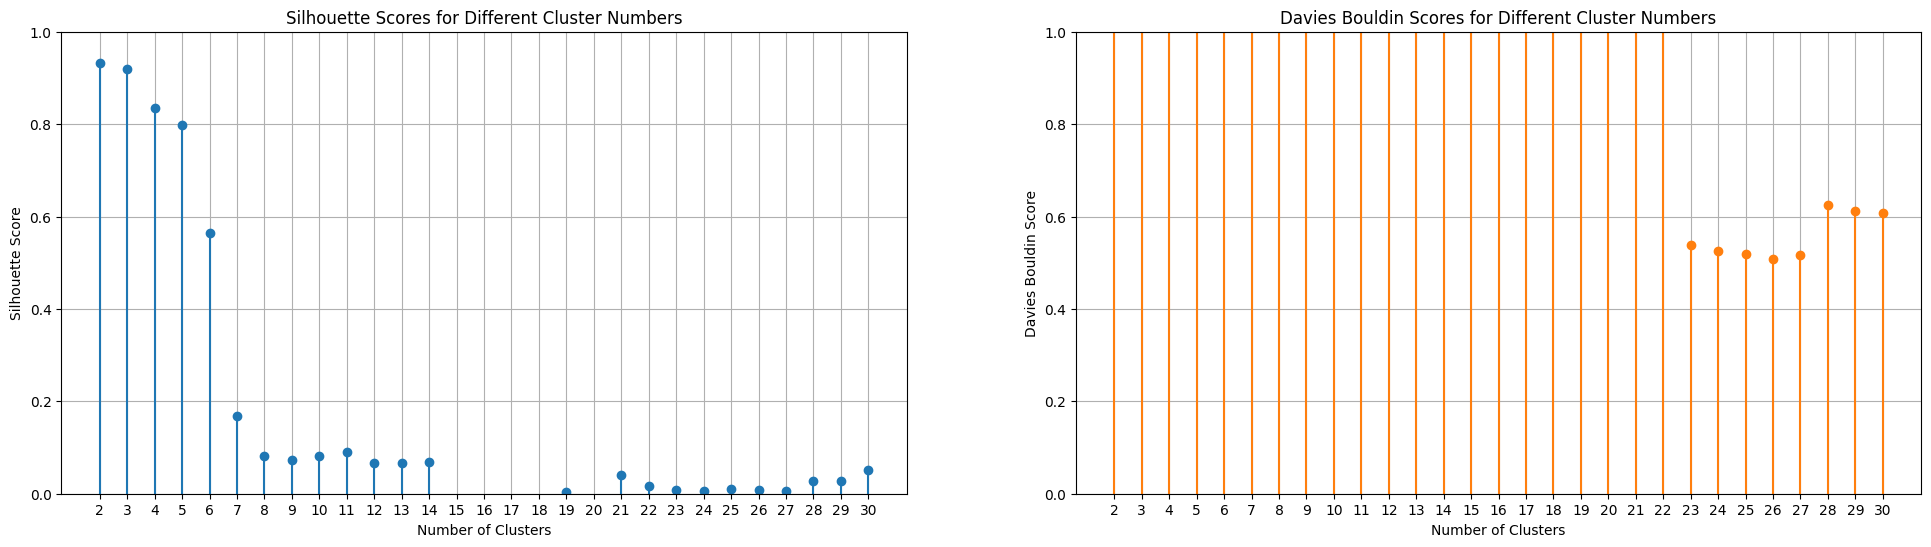

--- Metric: Euclidean
--- Linkage: Ward
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: agglomerative##########
Best score for Silhouette metric: 0.93 for 2 clusters
Best score for Davies Bouldin metric: 0.51 for 26 clusters

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------



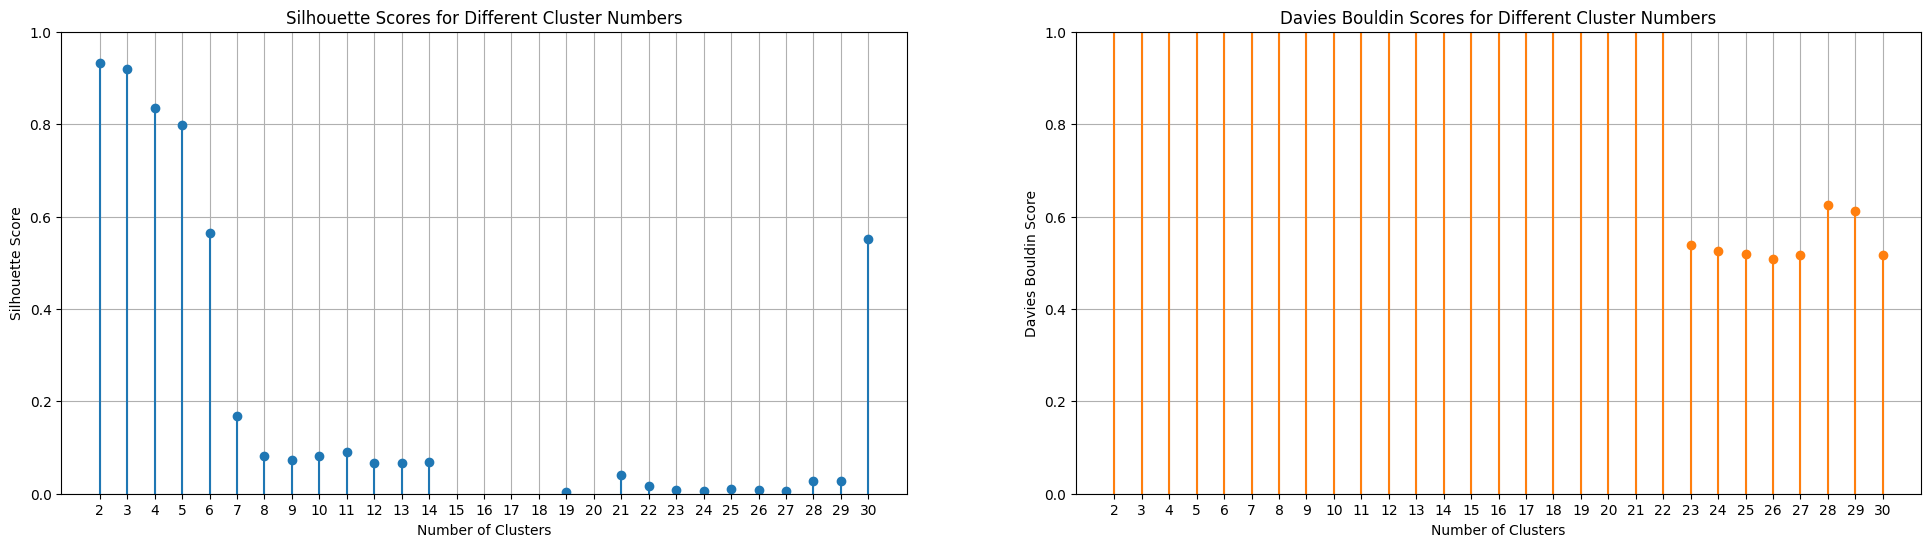

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

########## Metrics best performance for different clusters - Algorithm: dbscan##########
Best score for Silhouette metric: -0.19 for 2 clusters
Best score for Davies Bouldin metric: 0.89 for 2 clusters

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------



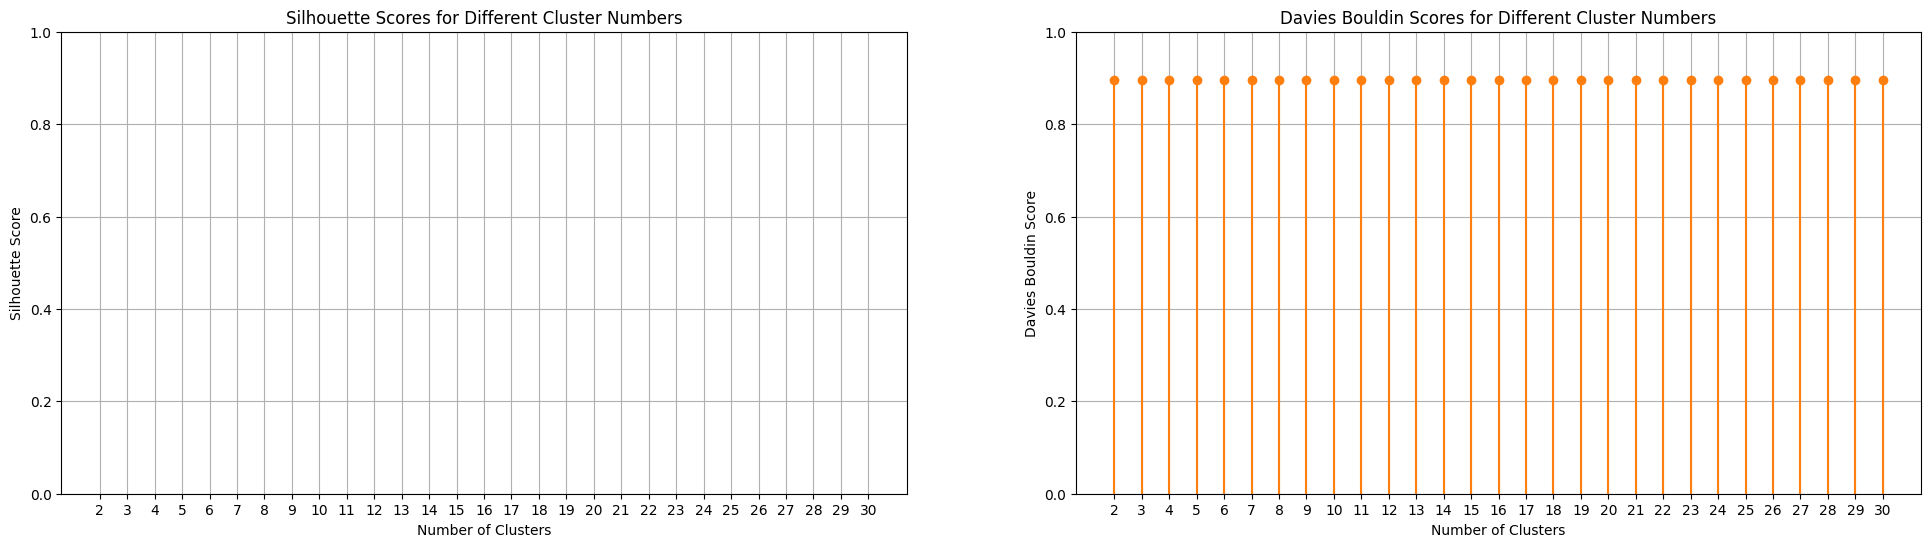

In [26]:
min_clusters = 2
max_clusters = 30

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for algorithm in ['k-means', 'mini-batch', 'agglomerative', 'dbscan']:
  try:
    if algorithm == 'agglomerative':
      for linkage in ['complete', 'average', 'single']:
        for metric in ['l1', 'l2', 'manhattan','cosine']:
          for n_clusters in clusters:
            s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_clustering(X, n_clusters, algorithm = algorithm, metric = metric, linkage = linkage)
          print(f'--- Metric: {metric}')
          print(f'--- Linkage: {linkage}')
          visualize_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, algorithm)
      print('--- Metric: Euclidean')
      print('--- Linkage: Ward')
      s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_clustering(X, n_clusters, algorithm = algorithm, metric = 'euclidean', linkage = 'ward')
      visualize_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, algorithm)

    else:
      for n_clusters in clusters:
        s_scores[n_clusters-2], dbs_scores[n_clusters-2] =  evaluate_clustering(X, n_clusters, algorithm = algorithm)
      visualize_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, algorithm)
  except:
    print(f'Not possible to run: {algorithm}')

## 4.4 - Fit test

In [27]:
from IPython.display import display

def model_validation(df, X, n_clusters = 2, algorithm = 'k-means', metric = 'euclidean', linkage = 'ward'):

  if algorithm == 'k-means':
      model = kmeans_clustering(X, n_clusters)
  elif algorithm == 'mini-batch':
      model = minibatch_kmeans_clustering(X, n_clusters)
  elif algorithm == 'dbscan':
      model = dbscan_clustering(X)
  elif algorithm == 'agglomerative':
      model = agglomerative_clustering(X, n_clusters, metric = metric, linkage = linkage)


  labels  = model.fit_predict(X)

  return labels

In [28]:
import plotly.express as px

def visu_clusters(df, x1, x2, labels):
    fig = px.scatter(df, x=df[x1].astype('string'), y=df[x2], color=labels)
    fig.update_traces(marker=dict(size=5))
    fig.update_layout(
        title=f'Scatter plot of {x1} over {x2}',
        xaxis_title=x1,
        yaxis_title=x2,
        legend_title="Categories",
        xaxis_tickangle=90,
        showlegend=True
    )
    fig.show()


In [29]:
from mpl_toolkits.mplot3d import Axes3D

def visu_clusters_3d(df1, df2, df3, df4, x1, x2, labels1, labels2, labels3, labels4):
    fig = plt.figure(figsize=(24, 18))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for Hospital 1
    ax.scatter(df1[x1].astype('string'), np.ones(len(df1)), df1[x2], c=labels1, s=5, cmap='rainbow')

    # Scatter plot for Hospital 2
    ax.scatter(df2[x1].astype('string'), 2 * np.ones(len(df2)), df2[x2], c=labels2, s=5, cmap='rainbow')

    # Scatter plot for Hospital 3
    ax.scatter(df3[x1].astype('string'), 3 * np.ones(len(df3)), df3[x2], c=labels3, s=5, cmap='rainbow')

    # Scatter plot for Hospital 4
    ax.scatter(df4[x1].astype('string'), 4 * np.ones(len(df4)), df4[x2], c=labels4, s=5, cmap='rainbow')

    # Set labels and title
    ax.set_xlabel(x1)
    ax.set_ylabel('Hospital')
    ax.set_zlabel(x2)
    ax.set_title('3D Scatter Plot')

    # Set y-ticks and labels for hospitals
    ax.set_yticks([1, 2, 3, 4])
    ax.set_yticklabels(['Hospital 1', 'Hospital 2', 'Hospital 3', 'Hospital 4'])

    # Increase space between ticks and axis label
    ax.tick_params(axis='x', rotation=90, pad=10)
    ax.tick_params(axis='y', pad=10)

    # Show the plot
    plt.show()


In [37]:
labels = model_validation(df[df['HOSPI_CODE_UCD']!= '3400891996128'].copy(),
                             X,
                             n_clusters = 18, algorithm = 'agglomerative', metric = 'manhattan', linkage = 'average')

visu_clusters(df[df['HOSPI_CODE_UCD']!= '3400891996128'].copy(),
              'HOSPI_CODE_UCD', 'QUANTITY',
              ['cat_' + str(s) for s in labels])

### Saving the datasets with clusters

In [31]:
df_clustered = df[df['HOSPI_CODE_UCD']!= '3400891996128'].copy()
df_clustered['CLUSTER'] = labels

flag = True
for cluster in df_clustered.CLUSTER.unique():
  for medicine in df_clustered[df_clustered['CLUSTER'] == cluster]['HOSPI_CODE_UCD'].unique():
    data_points = len(df_clustered[(df_clustered['CLUSTER'] == cluster) & (df_clustered['HOSPI_CODE_UCD'] == medicine)].values)
    if data_points < 4:
      print(cluster)
      print(medicine)


      flag = False
      print('The cluster has less than one sample of the medicine')
if flag:
  print('OK')



OK


In [38]:
df_clustered.to_csv('df_clustered_18.csv', index=False)